First few rows of the dataset:
   Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102 EE-119  \
0  CS-97001     B-     D+     C-         C     C-     D+      D     C-     B-   
1  CS-97002      A      D     D+         D     B-      C      D      A     D+   
2  CS-97003      A      B      A        B-     B+      A     B-     B+     A-   
3  CS-97004      D     C+     D+         D      D     A-     D+     C-      D   
4  CS-97005     A-     A-     A-        B+      A      A     A-     B+      A   

   ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423 CS-412   CGPA  
0  ...     C-     C-     C-     C-     A-      A     C-      B     A-  2.205  
1  ...     D+      D      C      D     A-     B-      C      C      B  2.008  
2  ...      B      B      A      C      A      A      A     A-      A  3.608  
3  ...     D+      C     D+     C-     B-      B     C+     C+     C+  1.906  
4  ...     B-     B+     B+     B-     A-      A     A-     A-      A  3.448  

[5 rows

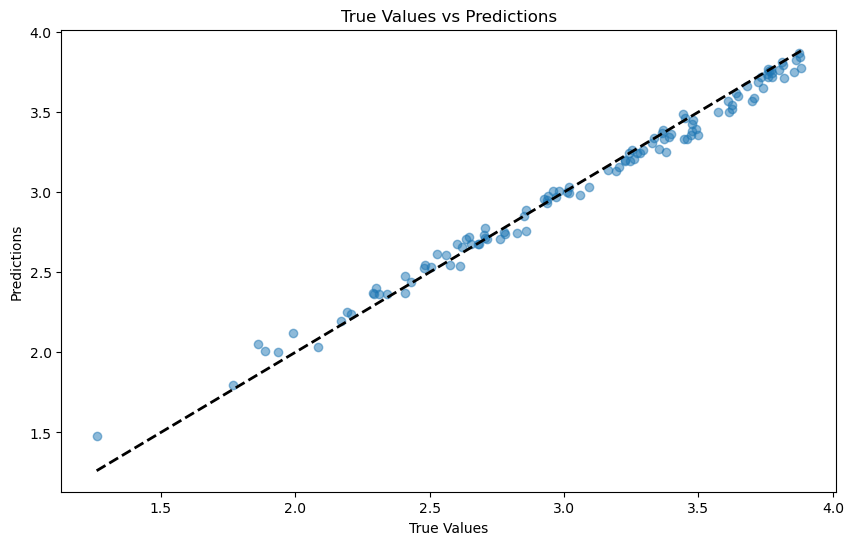

In [20]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://github.com/FlipRoboTechnologies/ML-Datasets/raw/main/Grades/Grades.csv'
data = pd.read_csv(url)

# Display rows of dataset
print("First few rows of the dataset:")
print(data.head())
print("\nData types and missing values:")
print(data.info())
print("\nSummary statistics:")
print(data.describe(include='all'))

# check for correct column name
print("\nColumn names in the dataset:")
print(data.columns)

# Drop non-predictive columns (check the column names and update accordingly)
# Assuming 'Seat No' is the correct column, but if it's named differently, use the correct name here
column_to_drop = 'Seat No'  # Update this if the actual column name is different
if column_to_drop in data.columns:
    data = data.drop([column_to_drop], axis=1)
else:
    print(f"Column '{column_to_drop}' not found in the dataset.")

# Identify numeric and non-numeric columns
numeric_cols = data.select_dtypes(include=['number']).columns
non_numeric_cols = data.select_dtypes(exclude=['number']).columns

# Impute missing values
if len(numeric_cols) > 0:
    numeric_imputer = SimpleImputer(strategy='median')
    data[numeric_cols] = numeric_imputer.fit_transform(data[numeric_cols])

if len(non_numeric_cols) > 0:
    non_numeric_imputer = SimpleImputer(strategy='most_frequent')
    data[non_numeric_cols] = non_numeric_imputer.fit_transform(data[non_numeric_cols])

# Convert categorical columns to one-hot encoded columns
data_encoded = pd.get_dummies(data)
print("\nFirst few rows of the encoded dataset:")
print(data_encoded.head())

# Separate features and target variable
X = data_encoded.drop('CGPA', axis=1)
y = data_encoded['CGPA']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nTraining set shape: {X_train.shape}, Testing set shape: {X_test.shape}")

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Optional: Plot the predictions vs true values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()